In [1]:
import pandas as pd
import matplotlib.pyplot as plt
probmap = pd.read_csv('probmap.csv')

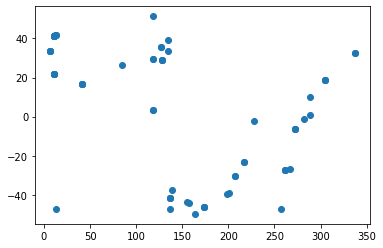

In [2]:
df = pd.DataFrame()
file = open('data.txt', 'r')
tids = []
oids = []
ras = []
decs = []
stimes = []
modes = []
for line in file.readlines():
    arr = line.split()
    tids.append(arr[0])
    oids.append(arr[1])
    ras.append(float(arr[2])*(15.) + float(arr[3])*(15./60.) + float(arr[4])*(15./360.))
    decs.append(float(arr[5]) + float(arr[6])/60. + float(arr[7])/360.)
    stimes.append(arr[8] + ' ' + arr[9])
    modes.append(arr[12])
df['targetid'] = tids
df['obsid'] = oids
df['ra'] = ras
df['dec'] = decs
df['start time'] = stimes
df['mode'] = modes
df = df[df['mode'] == 'PHOTON'].sort_values(by=['start time'])
plt.scatter(df['ra'], df['dec'])

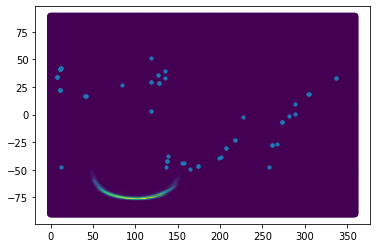

In [3]:
plt.figure()
plt.scatter(probmap['ra'], probmap['dec'], c=probmap['prob'])
plt.scatter(df['ra'], df['dec'], s=10)

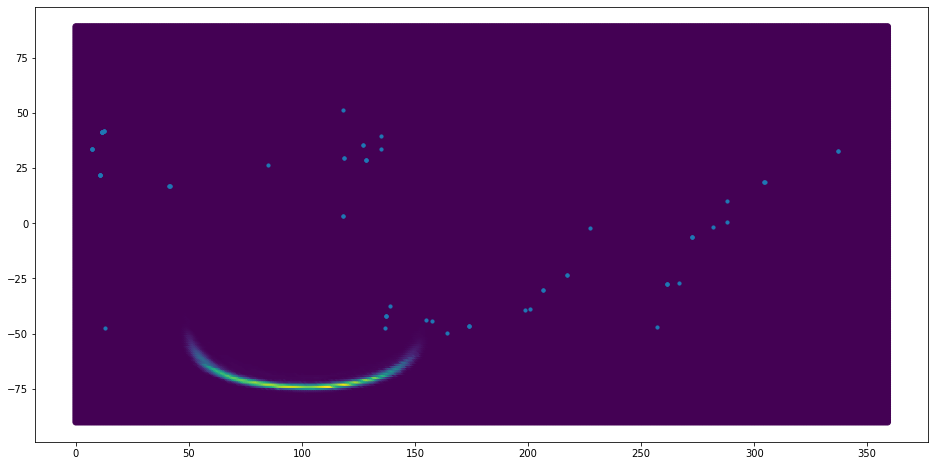

In [5]:
plt.figure(figsize=(16, 8))
plt.scatter(probmap['ra'], probmap['dec'], c=probmap['prob'])
plt.scatter(df['ra'], df['dec'], s=10)

In [25]:
from astropy import units as u
from astropy.coordinates import SkyCoord
b = [SkyCoord(ra=ra*u.degree, dec=dec*u.degree, frame='icrs').galactic.b.degree for ra in set(probmap['ra']) for dec in set(probmap['dec'])]
probmap['b'] = b
probmap.to_csv("probmap.csv")